# Ex. 1

In [1]:
library(mlbench)
data(Glass)
#data structure and missing values
str(Glass)

'data.frame':	214 obs. of  10 variables:
 $ RI  : num  1.52 1.52 1.52 1.52 1.52 ...
 $ Na  : num  13.6 13.9 13.5 13.2 13.3 ...
 $ Mg  : num  4.49 3.6 3.55 3.69 3.62 3.61 3.6 3.61 3.58 3.6 ...
 $ Al  : num  1.1 1.36 1.54 1.29 1.24 1.62 1.14 1.05 1.37 1.36 ...
 $ Si  : num  71.8 72.7 73 72.6 73.1 ...
 $ K   : num  0.06 0.48 0.39 0.57 0.55 0.64 0.58 0.57 0.56 0.57 ...
 $ Ca  : num  8.75 7.83 7.78 8.22 8.07 8.07 8.17 8.24 8.3 8.4 ...
 $ Ba  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fe  : num  0 0 0 0 0 0.26 0 0 0 0.11 ...
 $ Type: Factor w/ 6 levels "1","2","3","5",..: 1 1 1 1 1 1 1 1 1 1 ...


>(a) Using visualizations, explore the predictor variables to understand their distributions as well as the relationships between predictors

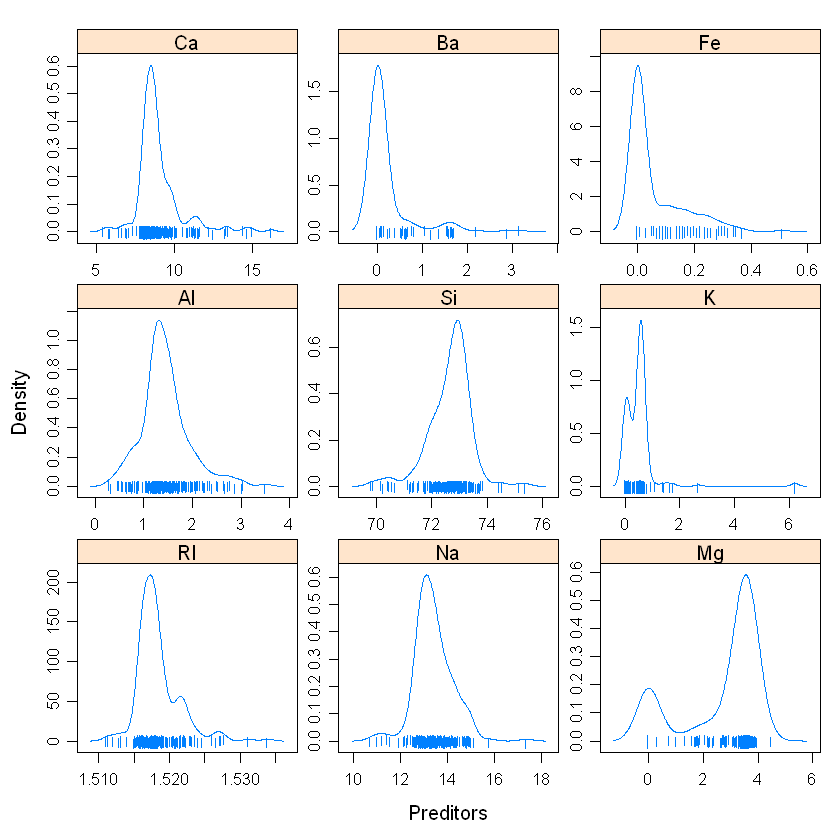

In [2]:
#distribution
library(reshape)
meltedGlass <- melt(Glass,id.vars="Type")

library(lattice)
densityplot(~value|variable,data=meltedGlass,
            scales = list(x=list(relation="free"),y=list(relation = "free")),
           adjust=1.25,pch="|",xlab="Preditors")

> (b) Does there appear to be any outliers in the data? Are predictors skewed

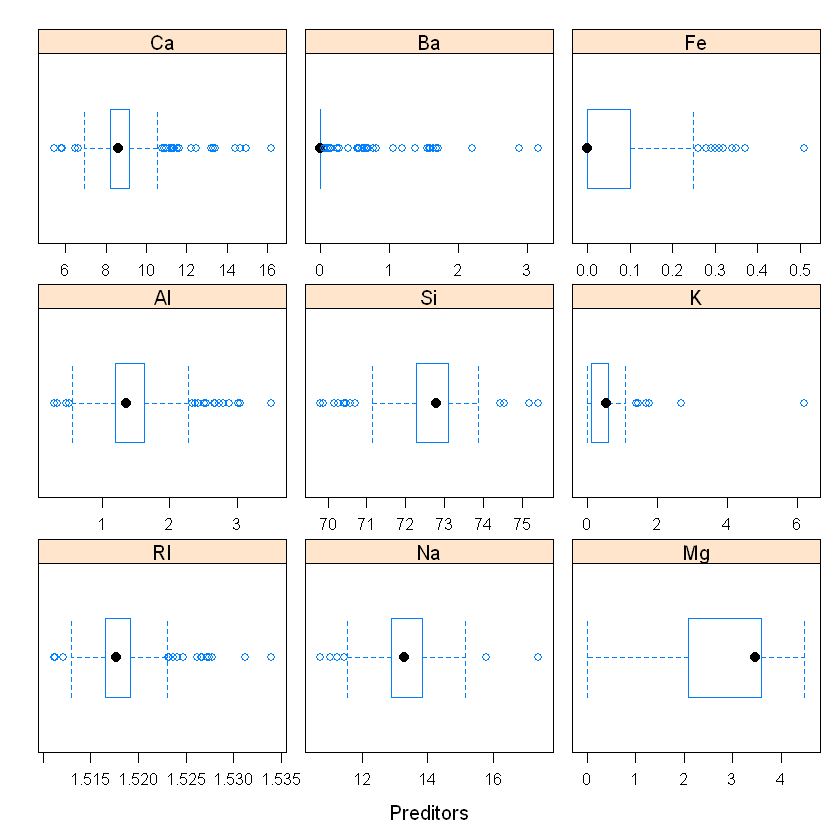

In [3]:
#outliners
bwplot(~value|variable,data=meltedGlass,
            scales = list(x=list(relation="free"),y=list(relation = "free")),
           xlab="Preditors")

Warning message:
"package 'ggcorrplot' was built under R version 3.5.1"Loading required package: ggplot2


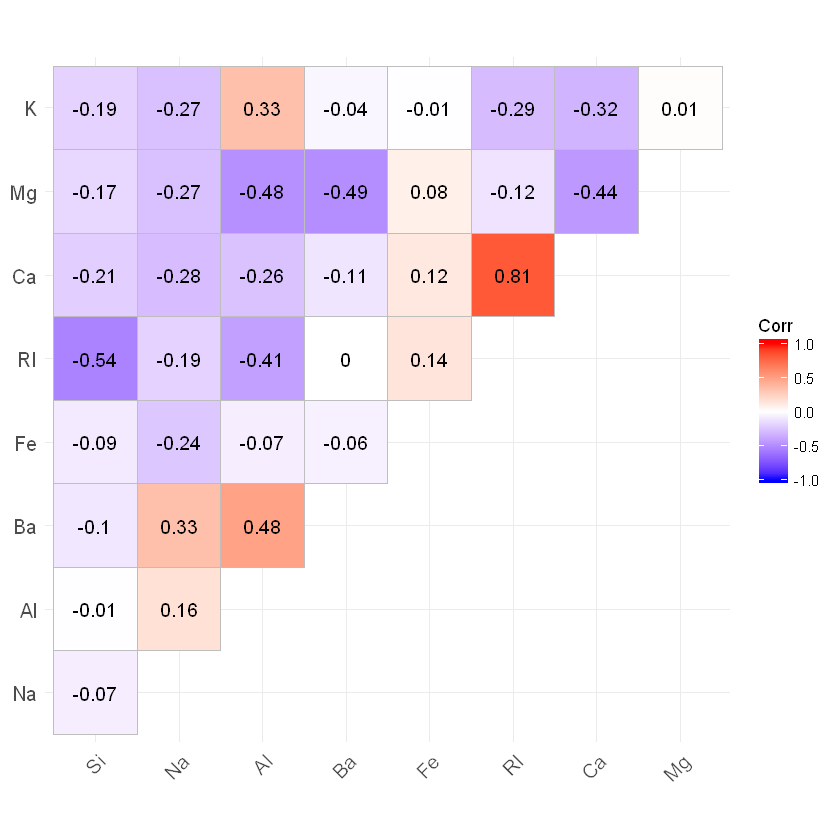

In [4]:
#cor
library(ggcorrplot)
ggcorrplot(round(cor(Glass[,1:9]),2), hc.order = TRUE, type = "upper", lab = TRUE)

Loading required package: carData


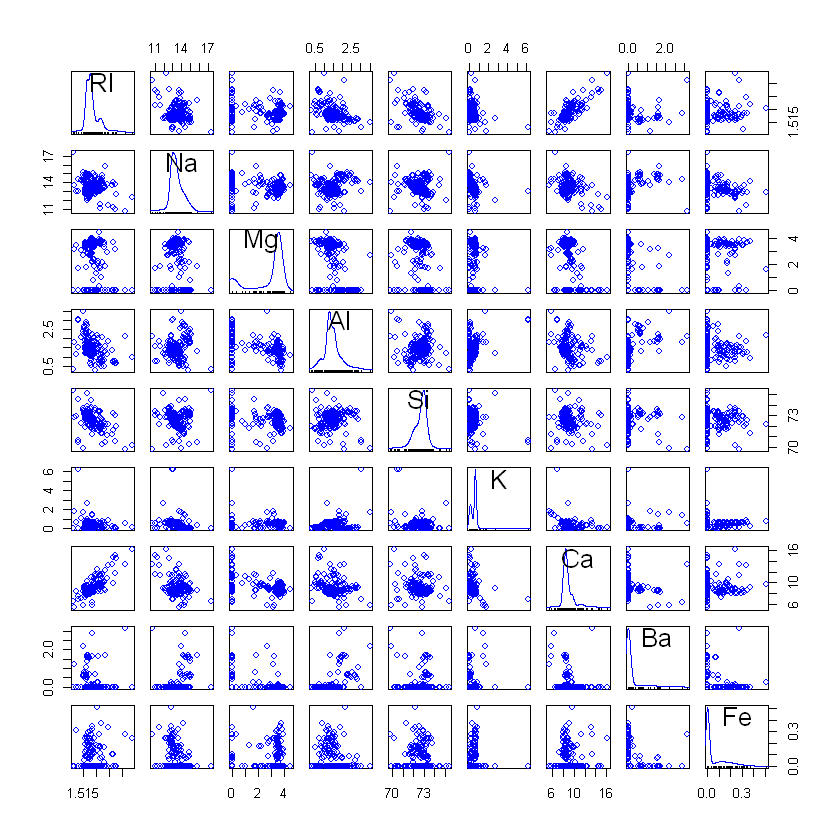

In [5]:
library(car)
spm(Glass[,1:9],smooth=F,regLine = F)

>(c) Are there any relevant transformations of one or more predictors that might improve the
classification model?

In [6]:
#For skewness, first note that several predictors have values of zer
library(caret)
trans_yj <- preProcess(Glass[,-10],method="YeoJohnson")
glass_yj <- predict(trans_yj,newdata = Glass[,-10])
glass_mlt <- melt(glass_yj)

Using  as id variables


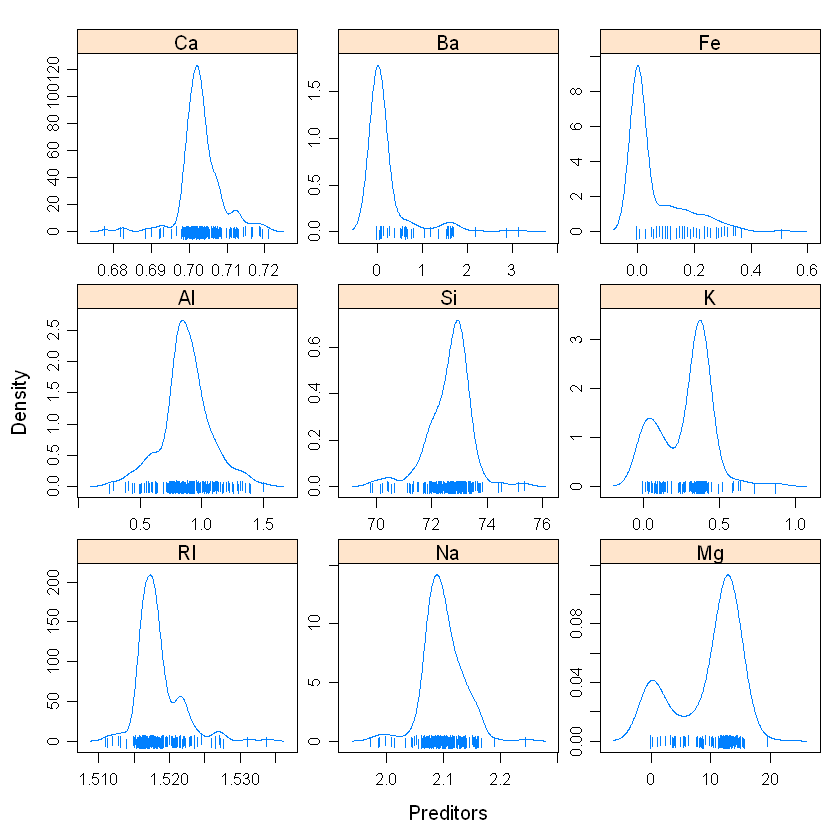

In [7]:
densityplot(~value|variable,data=glass_mlt,
            scales = list(x=list(relation="free"),y=list(relation = "free")),
           adjust=1.25,pch="|",xlab="Preditors")

In [8]:
trans_scaling <- preProcess(Glass[,-10],method = c("center","scale"))
glass_scaling <- predict(trans_scaling,newdata = Glass[,-10])
glass_spatial <- spatialSign(glass_scaling)
#https://github.com/topepo/caret/blob/master/pkg/caret/R/spatialSign.R
#https://stackoverflow.com/questions/28194655/r-is-spatialsign-function-useful-for-identifying-outliers

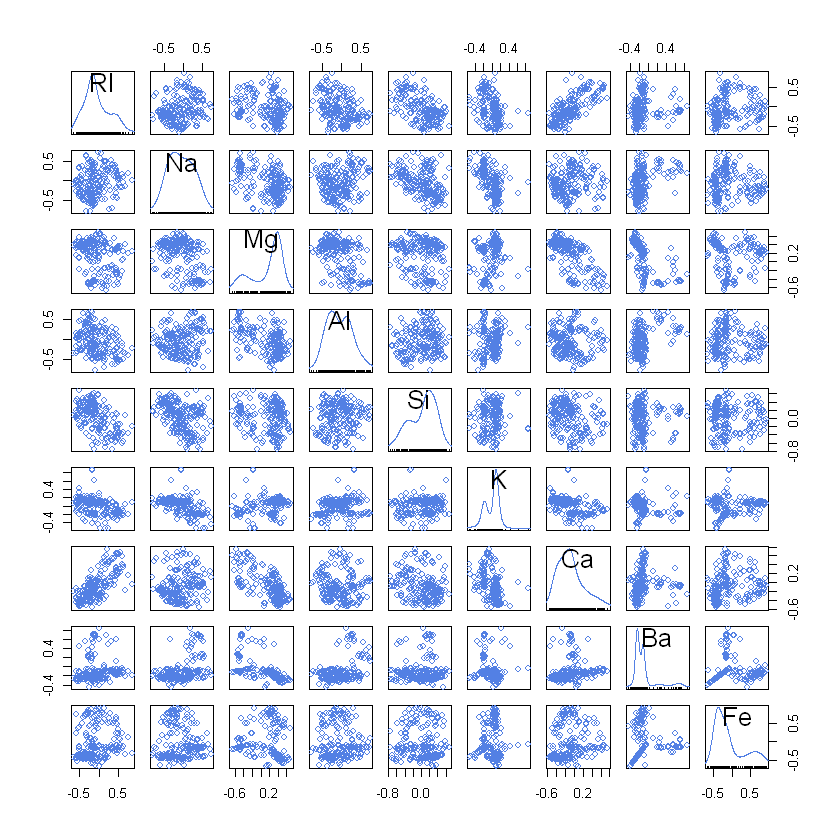

In [9]:
#splom(~glass_spatial,pch=16,col=rgb(.2,.2,.2,.4),cex=.5)

# df_mlt <- melt(data.frame(glass_spatial))
# densityplot(~value|variable,data=df_mlt,
#             scales = list(x=list(relation="free"),y=list(relation = "free")),
#            adjust=1.25,pch="|",xlab="Preditors")

spm(glass_spatial,smooth=F,regLine = F,col="#5380E4")